<img src="https://cdn.vectorstock.com/i/composite/23,35/cartoon-gangster-flipping-a-coin-vector-7112335.jpg" style="width: 360px;">

<h5 align="center">Image courtesy of <a href="http://kenbennerillustration.weebly.com/" target="_blank">Ken Benner</a></h5>

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from pylab import rcParams

%matplotlib inline
sns.set(style='ticks', palette='Set2', font_scale=1.5)

material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)
rcParams['figure.figsize'] = 16, 8

plt.xkcd();

1 heads, 0 tails

70 cents for heads

-40 cents for tails

100 coin flips

In [151]:
ivan_flips = [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0]

peter_flips = [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0]

In [152]:
i_a = ivan_flips.count(1)
i_b = ivan_flips.count(0)

p_a = peter_flips.count(1)
p_b = peter_flips.count(0)

In [132]:
def beta_pdf(x, a, b):
    return stats.beta.pdf(x, a, b)

def should_accept(acceptance_probability):
    # Use uninformed (flat) prior
    prior_data_point = np.random.uniform(0, 1)
    return acceptance_probability > prior_data_point

def calculate_acceptance_probability(proposed_state, current_state, a, b):
    p_proposed = beta_pdf(proposed_state, a, b)
    p_current = beta_pdf(current_state, a, b)
    return min(p_proposed / p_current, 1)

def propose_state():
    return np.random.uniform(0, 1)

def beta_mcmc(a, b, iterations=5000):
    traces = []
    current_state = propose_state()
    for _ in range(iterations):
        traces.append(current_state)
        proposed_state = propose_state()
        acceptance_prob = calculate_acceptance_probability(proposed_state, current_state, a, b)
        if should_accept(acceptance_prob):
            current_state = proposed_state
    return_trace_count = max(int(0.4 * iterations), 2000)
    return traces[-return_trace_count:]

In [133]:
def plot_beta(a, b, label):
    traces = beta_mcmc(a, b, 10000)
    text = label + ": h="+str(a)+", t="+str(b)
    plt.hist(traces,
             normed=True,
             bins=25,
             histtype='stepfilled',
             label=text)

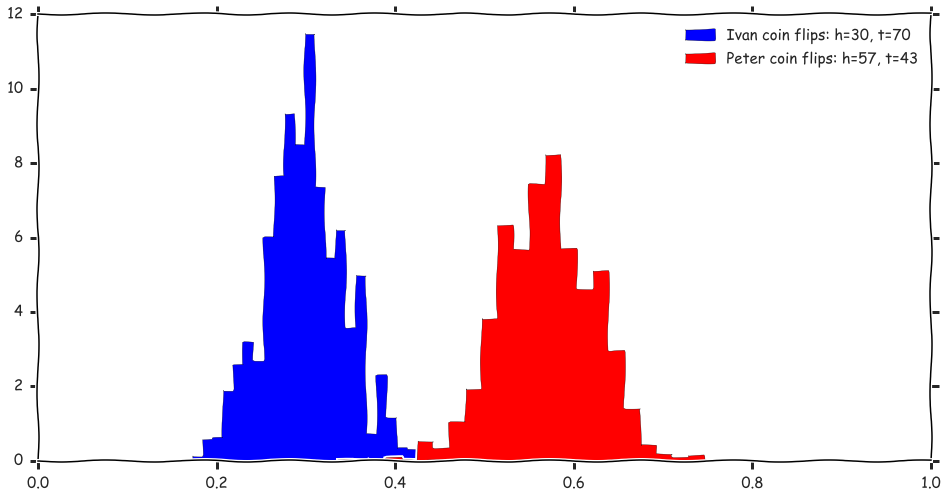

In [228]:
plt.hold(True)
plot_beta(i_a, i_b, "Ivan coin flips")
plot_beta(p_a, p_b, "Peter coin flips")
plt.legend()
plt.xlim((0, 1))
plt.show()

In reality the coin in Ivan's hands had about 35% probability of landing heads. And the one in Peter's pocket? It was a fair coin (50/50). So 100 flips from both of those coins look like this:

In [182]:
ivan_flips = np.random.binomial(1, 0.35, 100)
peter_flips = np.random.binomial(1, 0.5, 100)
print("100 flips with Ivan's coin:\n", ivan_flips)
print()
print("100 flips with Peter's coin:\n", peter_flips)

100 flips with Ivan's coin:
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1]

100 flips with Peter's coin:
 [0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1]


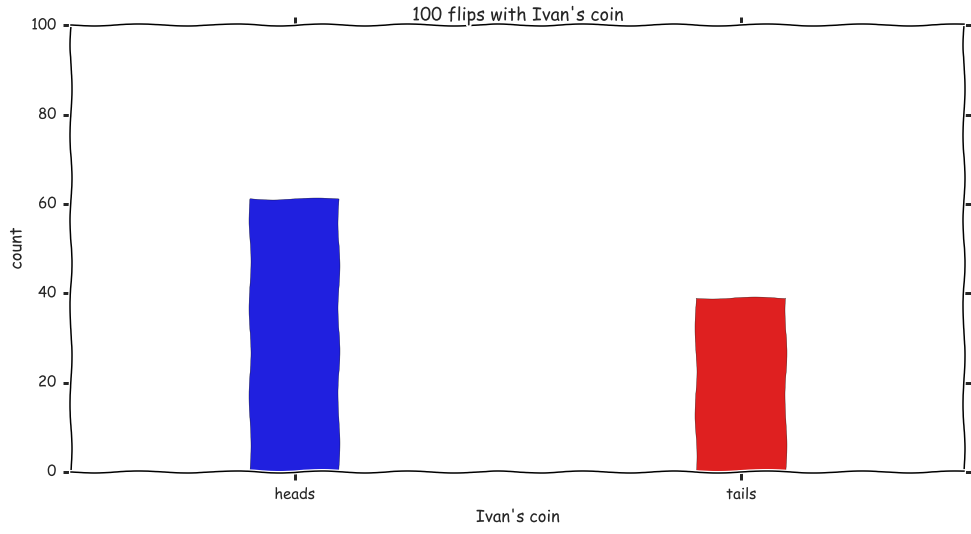

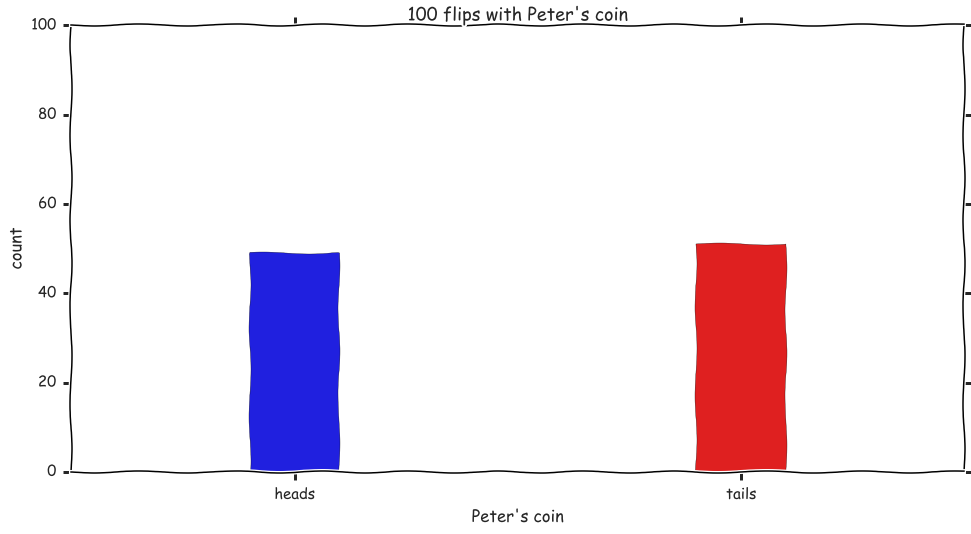

In [238]:
def adjust_bar_widths(axis):
    for bar in axis.patches:
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width / 2.
        new_width = 0.2
        bar.set_x( centre - new_width /2.)
        bar.set_width(new_width)

df = pd.DataFrame.from_dict(dict(ivan=ivan_flips, peter=peter_flips))

ax = sns.countplot(x='ivan', data=df)
ax.set_title("100 flips with Ivan's coin")
ax.set_xticklabels(['heads', 'tails'])
ax.set_xlabel("Ivan's coin")
ax.set_ylabel("count")
ax.set_ylim((0, 100))
adjust_bar_widths(ax)
plt.show()

ax = sns.countplot(x='peter', data=df)
ax.set_title("100 flips with Peter's coin")
ax.set_xticklabels(['heads', 'tails'])
ax.set_xlabel("Peter's coin")
ax.set_ylabel("count")
ax.set_ylim((0, 100))
adjust_bar_widths(ax)
plt.show()